# Predicting Calories Burned 

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("gym_members_exercise_tracking.csv")
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

#### Descriptive Stats:

In [5]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


#### Checking for missing data

In [6]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

##### EDA

c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

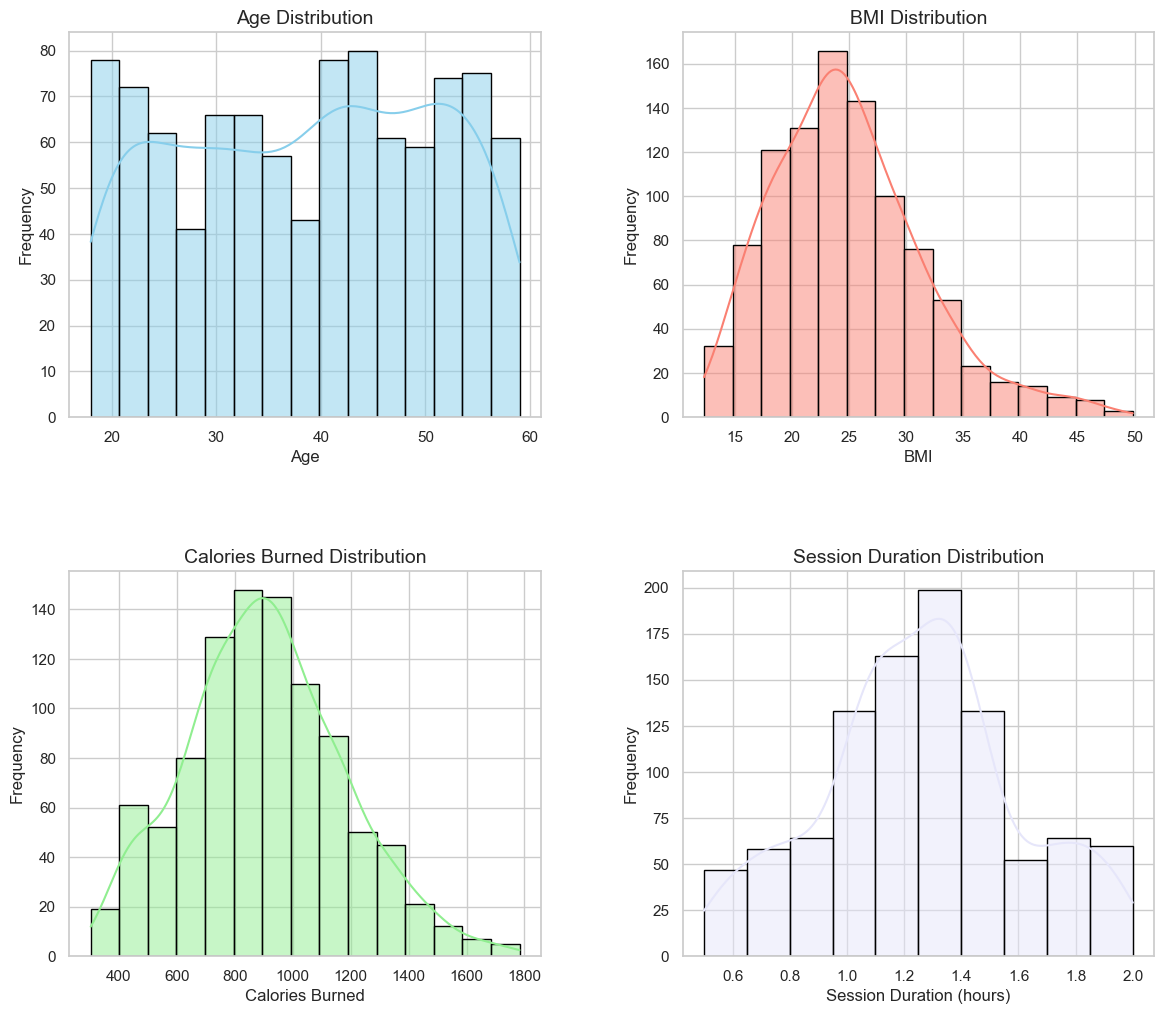

In [7]:
sns.set(style="whitegrid")
sns.set_palette("muted")

# Set up the figure canvas for multiple plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Age Distribution
sns.histplot(data['Age'], bins=15, kde=True, color="skyblue", edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution', fontsize=14)
axs[0, 0].set_xlabel('Age', fontsize=12)
axs[0, 0].set_ylabel('Frequency', fontsize=12)

# BMI Distribution
sns.histplot(data['BMI'], bins=15, kde=True, color="salmon", edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_title('BMI Distribution', fontsize=14)
axs[0, 1].set_xlabel('BMI', fontsize=12)
axs[0, 1].set_ylabel('Frequency', fontsize=12)

# Calories Burned Distribution
sns.histplot(data['Calories_Burned'], bins=15, kde=True, color="lightgreen", edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_title('Calories Burned Distribution', fontsize=14)
axs[1, 0].set_xlabel('Calories Burned', fontsize=12)
axs[1, 0].set_ylabel('Frequency', fontsize=12)

# Session Duration Distribution
sns.histplot(data['Session_Duration (hours)'], bins=10, kde=True, color="lavender", edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_title('Session Duration Distribution', fontsize=14)
axs[1, 1].set_xlabel('Session Duration (hours)', fontsize=12)
axs[1, 1].set_ylabel('Frequency', fontsize=12)

# Add spacing between plots
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # wspace controls width spacing, hspace controls height spacing
plt.show()

In [8]:
gym_data = data.copy()

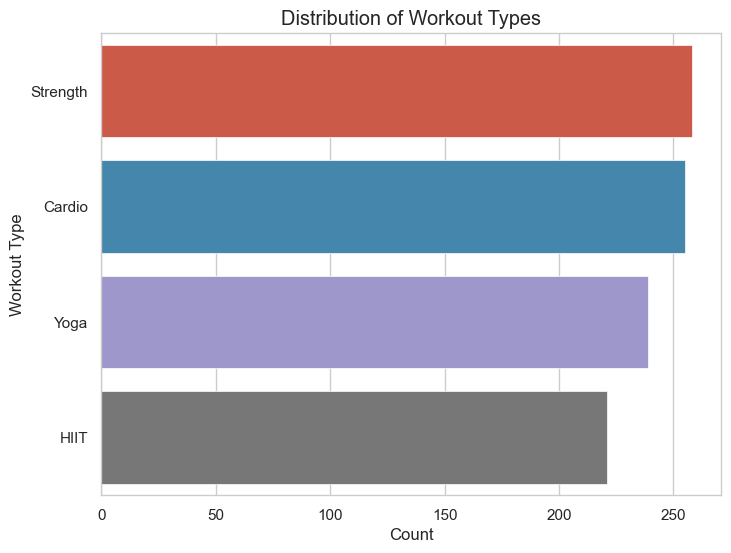

In [9]:
# Plot the distribution of the target variable 'Workout_Type'
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(y='Workout_Type', data=gym_data, order=gym_data['Workout_Type'].value_counts().index)
plt.title('Distribution of Workout Types')
plt.xlabel('Count')
plt.ylabel('Workout Type')
plt.show()


### Since Gender and Workout_Type are the only two categorical variables, we will one-hot encode them to see if they are useful.

In [10]:
gym_data_copy = gym_data.copy() #making a copy of the dataset
gym_data = pd.get_dummies(gym_data, columns=['Gender'], drop_first=True, dtype=int)
gym_data = pd.get_dummies(gym_data, columns=['Workout_Type'], dtype=int)

gym_data.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1,0,0,0,1
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0,0,1,0,0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0,1,0,0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1,0,0,1,0
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1,0,0,1,0
